In [2]:
# =============================================================================
# NOTEBOOK: 02_visual_analysis.ipynb
# OBJETIVO: Análisis visual dirigido a partir de datos limpios.
# TAREA DEL PLAN: p2_viz
# =============================================================================

# --- 1. Importación de Librerías ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# =============================================================================
# --- 2. Carga de Datos Limpios ---
# Cargamos directamente el archivo CSV procesado por el notebook 01.
# Este enfoque es más eficiente y modular.
# =============================================================================

# Construir la ruta al archivo limpio
ruta_archivo_limpio = os.path.join('..', 'data', '02_processed', 'brfss_2022_cleaned.csv')

# Cargar el dataset
try:
    df_analisis = pd.read_csv(ruta_archivo_limpio)
    print("✅ Datos limpios cargados exitosamente.")
    print(f"Dimensiones del DataFrame: {df_analisis.shape}")
except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo '{ruta_archivo_limpio}'.")
    print("Asegúrate de haber ejecutado primero el notebook '01_exploratory_data_analysis.ipynb' para generar este archivo.")

# --- 3. Configuración de Estilo para los Gráficos ---
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-paper')


✅ Datos limpios cargados exitosamente.
Dimensiones del DataFrame: (442067, 21)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7196\1356599302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='CVDINFR4', data=df_analisis, palette=['#4374B3', '#FF6347'])


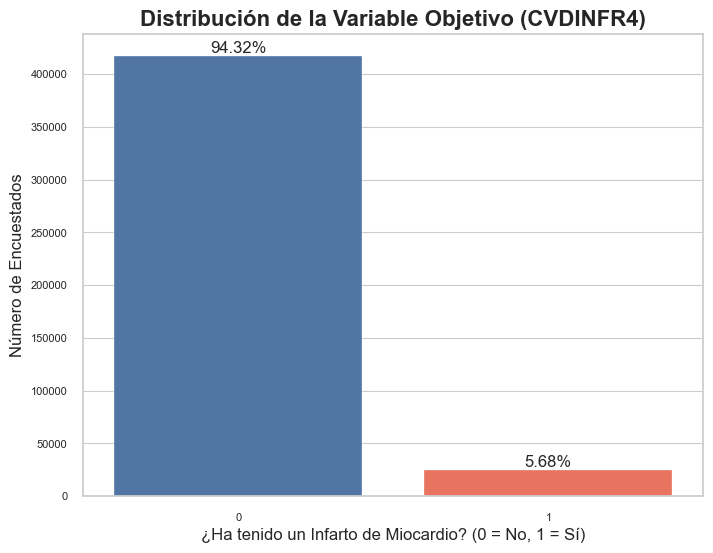

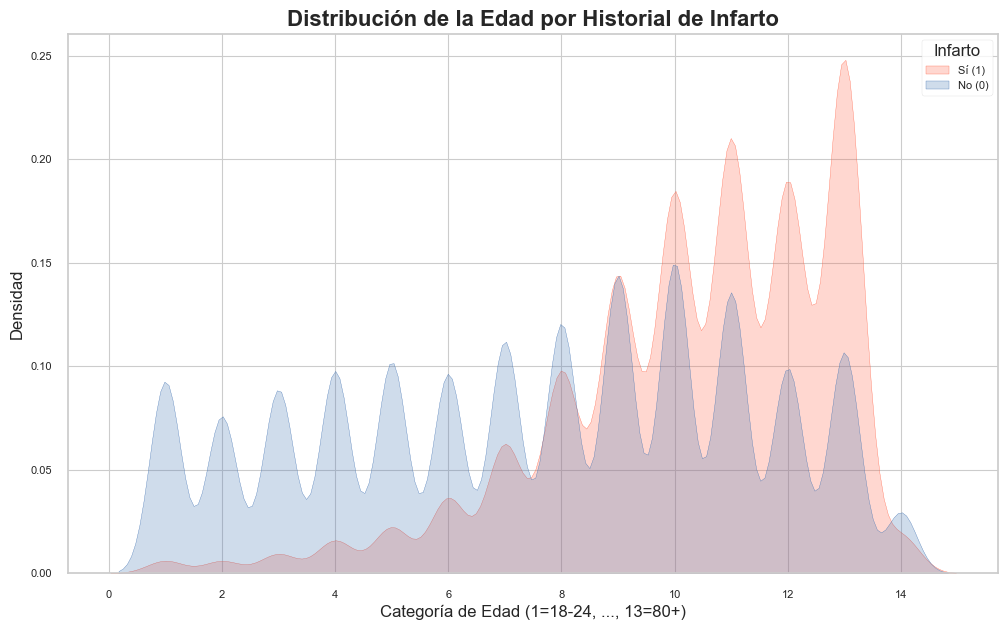

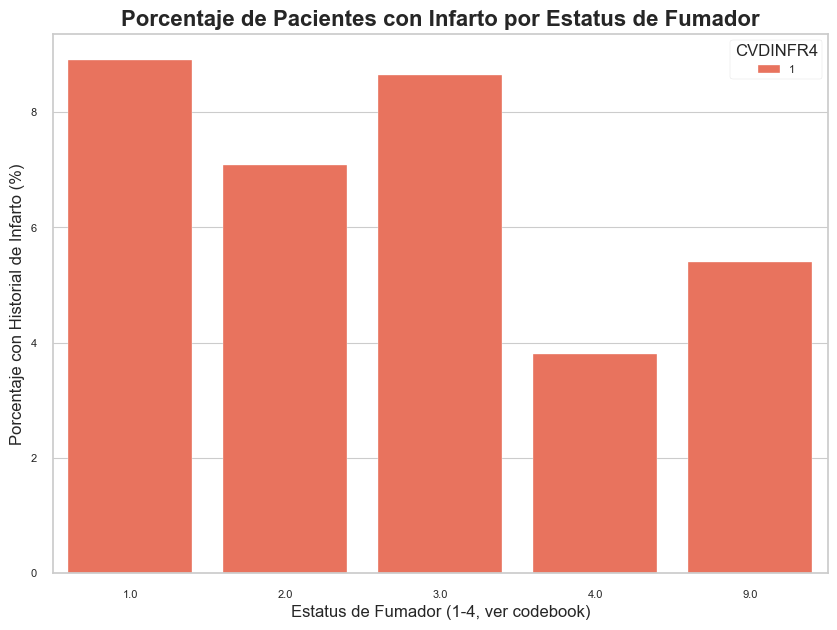

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7196\1356599302.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_analisis, x='CVDINFR4', y='_BMI5', palette=['#4374B3', '#FF6347'])


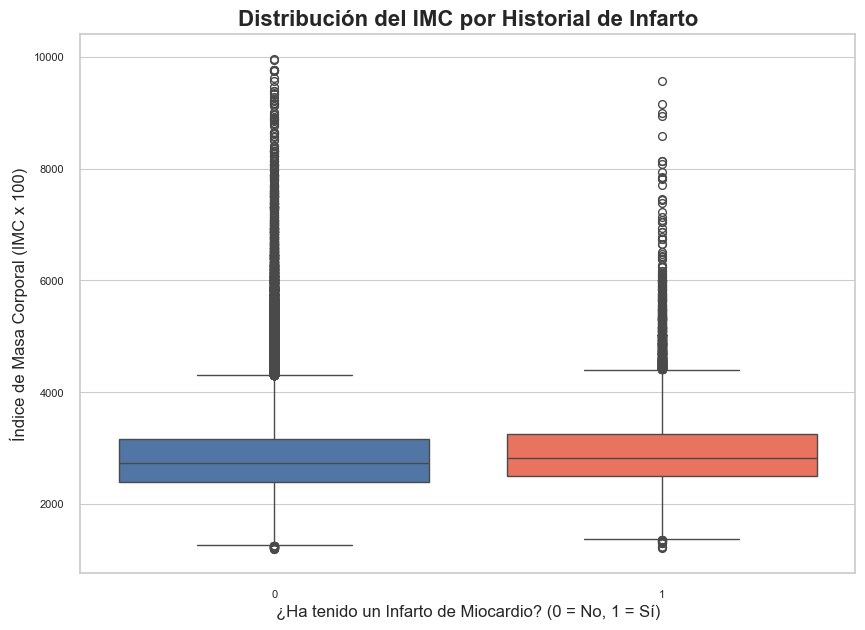

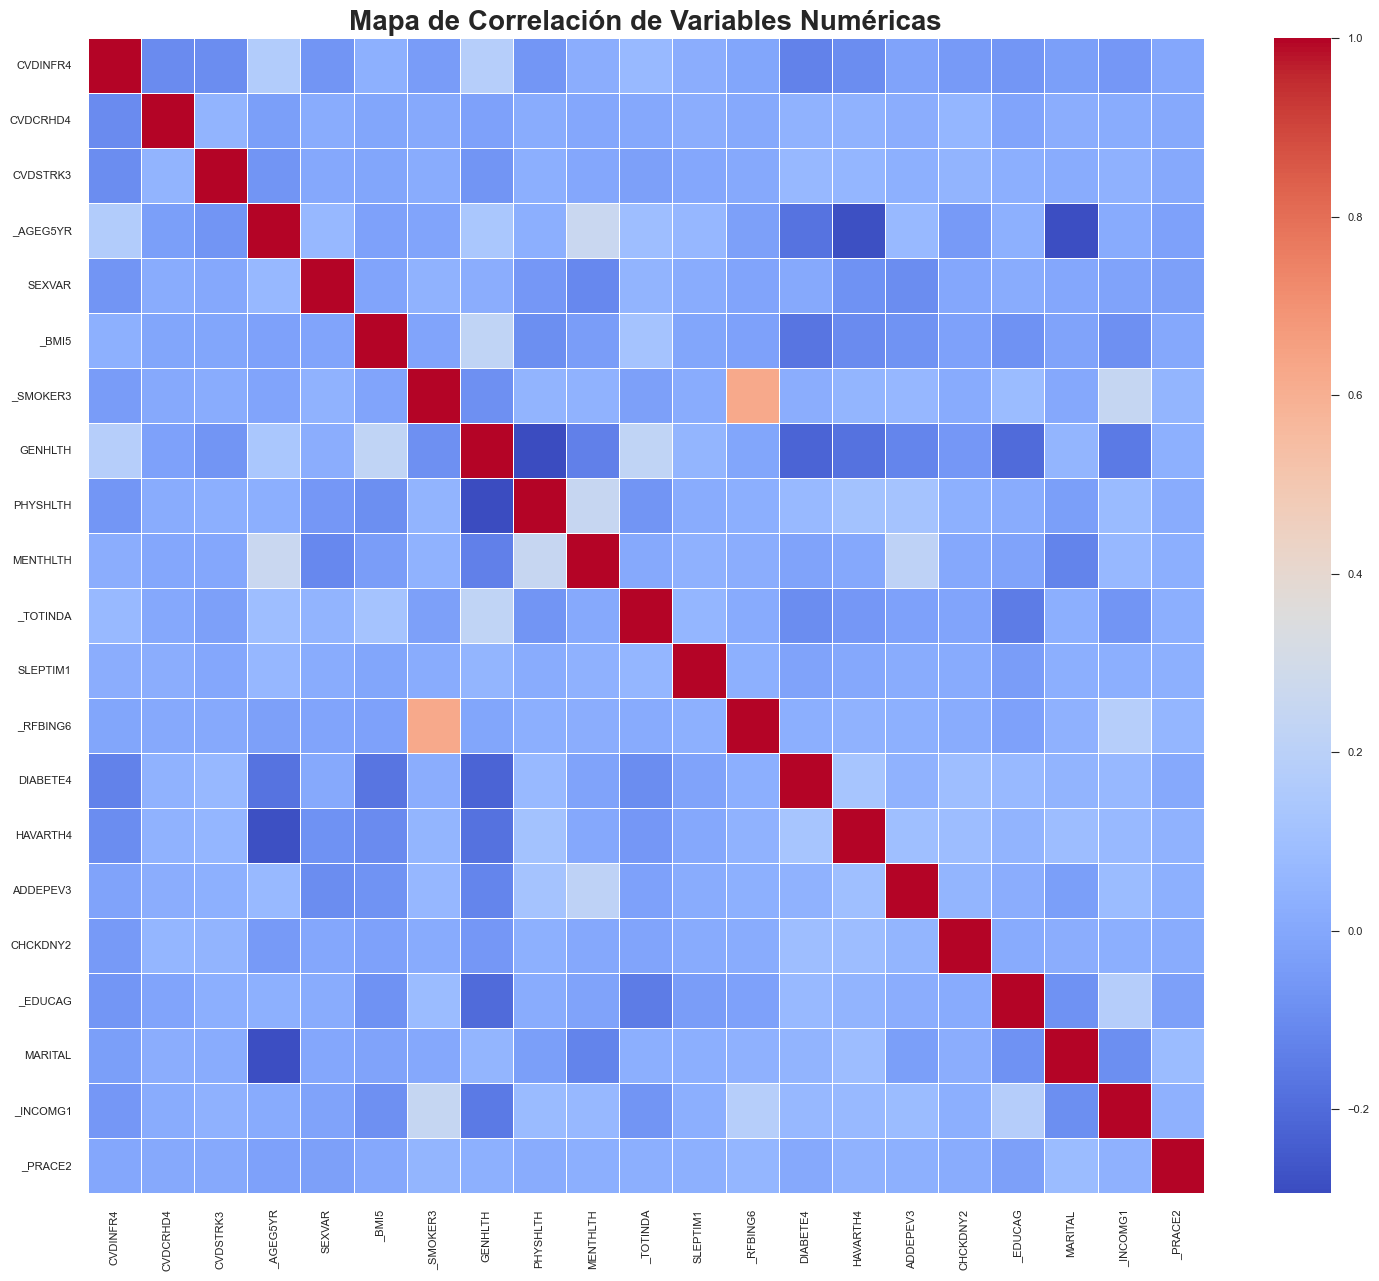

In [3]:
# =============================================================================
# --- 3. ANÁLISIS DE LA VARIABLE OBJETIVO ---
# =============================================================================
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CVDINFR4', data=df_analisis, palette=['#4374B3', '#FF6347'])
plt.title('Distribución de la Variable Objetivo (CVDINFR4)', fontsize=16, weight='bold')
plt.xlabel('¿Ha tenido un Infarto de Miocardio? (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Número de Encuestados', fontsize=12)

# Añadir porcentajes a las barras para mayor claridad
total = len(df_analisis['CVDINFR4'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

# =============================================================================
# --- 4. ANÁLISIS BIVARIADO: FACTORES DE RIESGO vs. INFARTO ---
# =============================================================================

# --- 4.1. Edad vs. Infarto ---
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_analisis, x='_AGEG5YR', hue='CVDINFR4', fill=True, 
            common_norm=False, palette=['#4374B3', '#FF6347'])
plt.title('Distribución de la Edad por Historial de Infarto', fontsize=16, weight='bold')
plt.xlabel('Categoría de Edad (1=18-24, ..., 13=80+)', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Infarto', labels=['Sí (1)', 'No (0)'])
plt.show()

# --- 4.2. Variables Categóricas (Ej: Fumador) vs. Infarto ---
# Usaremos una gráfica de barras porcentual para normalizar y comparar
df_smoker = df_analisis.groupby('_SMOKER3')['CVDINFR4'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x='_SMOKER3', y='percent', hue='CVDINFR4', data=df_smoker[df_smoker['CVDINFR4']==1], palette=['#FF6347'])
plt.title('Porcentaje de Pacientes con Infarto por Estatus de Fumador', fontsize=16, weight='bold')
plt.xlabel('Estatus de Fumador (1-4, ver codebook)', fontsize=12)
plt.ylabel('Porcentaje con Historial de Infarto (%)', fontsize=12)
plt.show()
# **ACCIÓN**: Repite este tipo de gráfico para 'DIABETE4', 'ADDEPEV3', '_EDUCAG', etc.

# --- 4.3. Variables Continuas (Ej: IMC) vs. Infarto ---
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_analisis, x='CVDINFR4', y='_BMI5', palette=['#4374B3', '#FF6347'])
plt.title('Distribución del IMC por Historial de Infarto', fontsize=16, weight='bold')
plt.xlabel('¿Ha tenido un Infarto de Miocardio? (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Índice de Masa Corporal (IMC x 100)', fontsize=12)
plt.show()
# **ACCIÓN**: Repite este tipo de gráfico para 'SLEPTIM1'.

# =============================================================================
# --- 5. ANÁLISIS MULTIVARIADO ---
# =============================================================================
# Seleccionar solo columnas numéricas para el mapa de calor
numeric_cols = df_analisis.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Correlación de Variables Numéricas', fontsize=20, weight='bold')
plt.show()